Prediction - *Testing*

In [19]:
import pickle
import torch

import numpy as np
import pandas as pd

from Modules import BaseDatasetPalm, CNN_MNV2, predict, QQ_plot, Prediction_plot
from torch.utils.data import DataLoader


In [20]:
#loading of the Scalers to convert the normalized values back to actual values
MinMax_Scaler_meteo = pickle.load(open('/home/u108-n256/PalmProject/NeuralNetwork_Testing/NN_Inputs/Scaler_Meteorological.pkl', 'rb'))
MinMax_Scaler_pheno = pickle.load(open('/home/u108-n256/PalmProject/NeuralNetwork_Testing/NN_Inputs/Scaler_Phenological.pkl', 'rb'))

def inverse_scale(X, scale, mini):
    X = (X /scale) + mini
    return X

In [21]:
#Laodd the dataset & dataloader
dataset = BaseDatasetPalm('female', site=['PR'], train=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
print('Dataset loaded')

#Set up model
model = CNN_MNV2()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Load the model
model.load_state_dict(torch.load('/home/u108-n256/PalmProject/CrossValidation/OPTIM/Optimized_CNN_best.pt'))
print('Model loaded')

#Predict
print('Predicting...')
Model_1 = predict(model, dataloader, device)

#Denormalize the data & save
Model_1_scaled = pd.DataFrame(inverse_scale(Model_1.values, MinMax_Scaler_pheno.scale_[7], MinMax_Scaler_pheno.data_min_[7]), columns=['Predicted','Actual'])
Model_1_scaled.to_csv("/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240919_Predictions_CNN/Model_PR_Prediction_male_all_data.csv", index=False)


Retrieving data from /home/u108-n256/PalmProject/NeuralNetwork_Testing/NN_Inputs/PR
Dataset loaded
Model loaded
Predicting...


     Predicted  Actual
0     0.754686   1.750
1     0.443138   1.375
2     1.321763   1.875
3     0.610995   1.500
4     0.070824   0.750
..         ...     ...
406   0.253537   0.625
407   0.669404   0.750
408   0.416325   0.625
409   0.191203   1.125
410   0.013314   0.000

[411 rows x 2 columns]


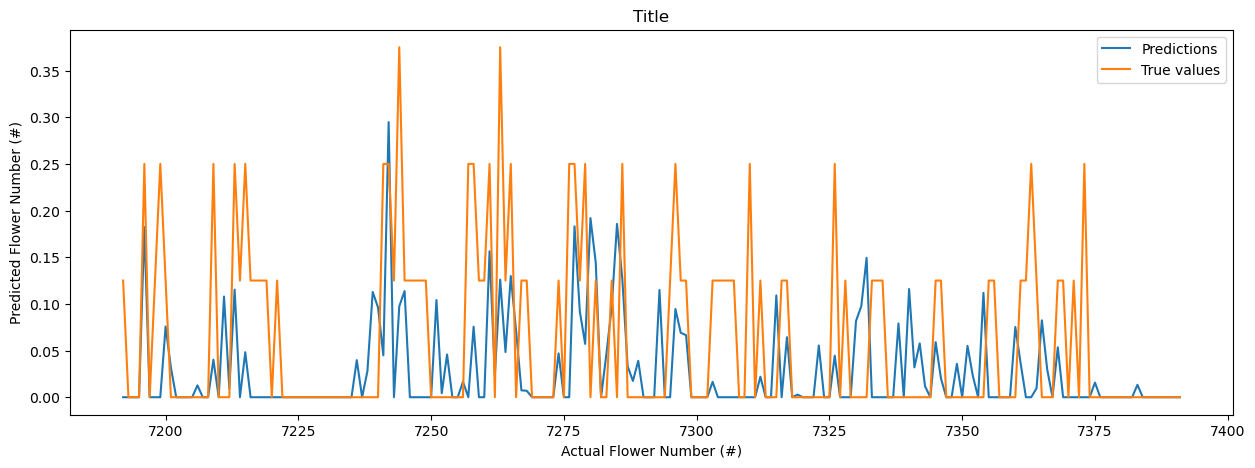

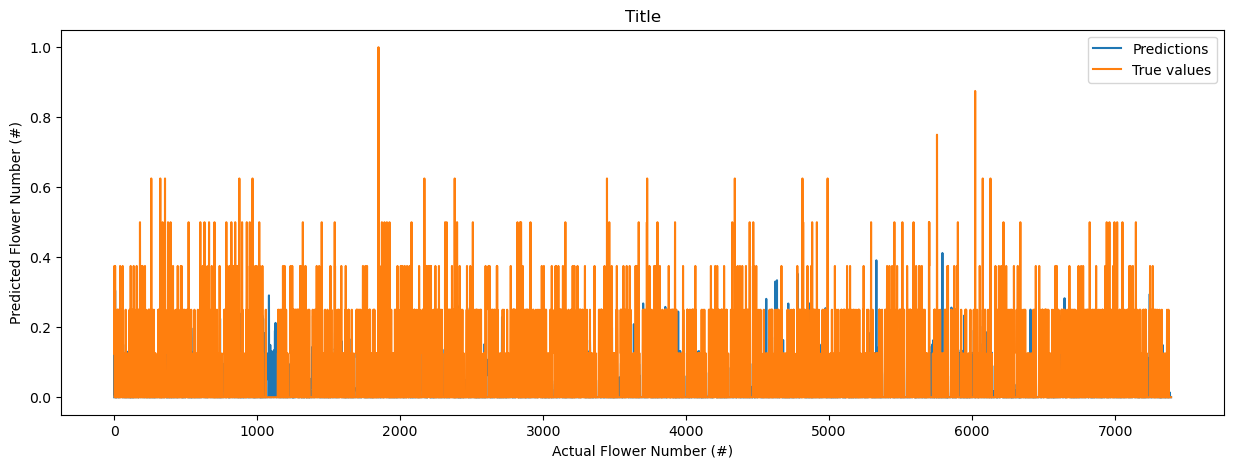

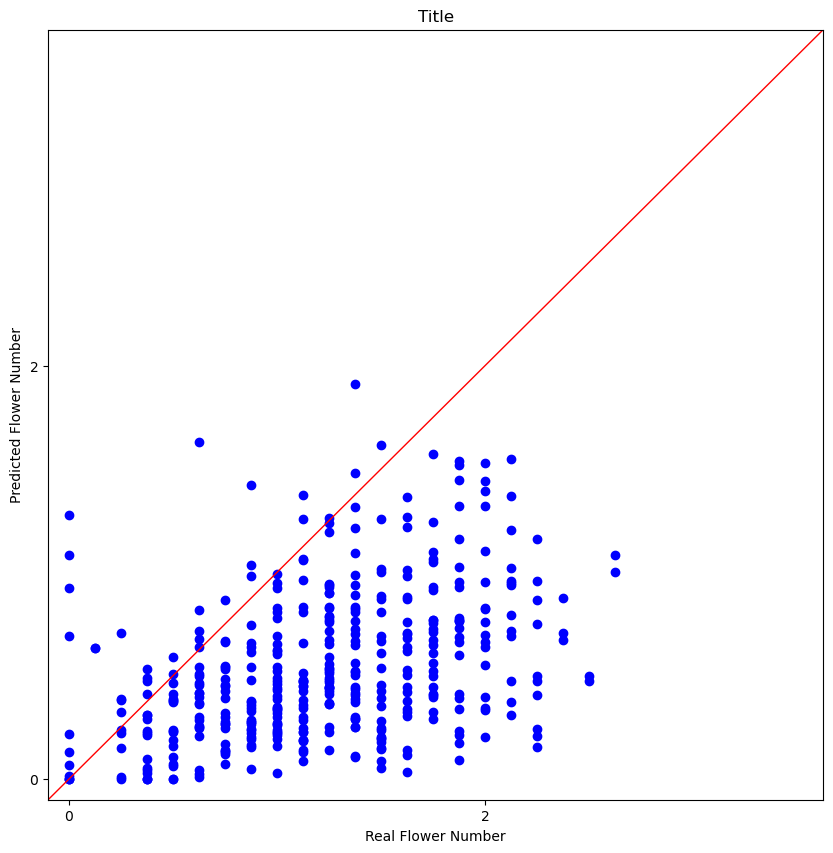

In [22]:
Model_1_scaled = pd.read_csv('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240919_Predictions_CNN/Model_PR_Prediction_male_all_data.csv')
mean = np.mean(Model_1_scaled['Actual'].values)
Prediction_plot(Model_1.iloc[-200:])
Prediction_plot(Model_1)
QQ_plot(Model_1)

In [23]:
#Laodd the dataset & dataloader
dataset = BaseDatasetPalm('female', site=['SMSE'], train=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
print('Dataset loaded')

#Set up model
model = CNN_MNV2()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Load the model
model.load_state_dict(torch.load('/home/u108-n256/PalmProject/CrossValidation/OPTIM/Optimized_CNN_best.pt'))
print('Model loaded')

#Predict
print('Predicting...')
Model_2 = predict(model, dataloader, device)

#Denormalize the data & save
Model_2_scaled = pd.DataFrame(inverse_scale(Model_2.values, MinMax_Scaler_pheno.scale_[7], MinMax_Scaler_pheno.data_min_[7]), columns=['Predicted','Actual'])
Model_2_scaled.to_csv('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240919_Predictions_CNN/Model_SMSE_Prediction_male_all_data.csv', index=False)

Retrieving data from /home/u108-n256/PalmProject/NeuralNetwork_Testing/NN_Inputs/SMSE
Dataset loaded
Model loaded
Predicting...


     Predicted  Actual
0     1.300270   2.250
1     2.121875   1.500
2     1.473292   1.250
3     0.764983   1.625
4     1.057732   1.750
..         ...     ...
373   1.439318   1.000
374   0.869923   1.750
375   1.096908   1.875
376   1.030299   1.625
377   0.116619   0.000

[378 rows x 2 columns]


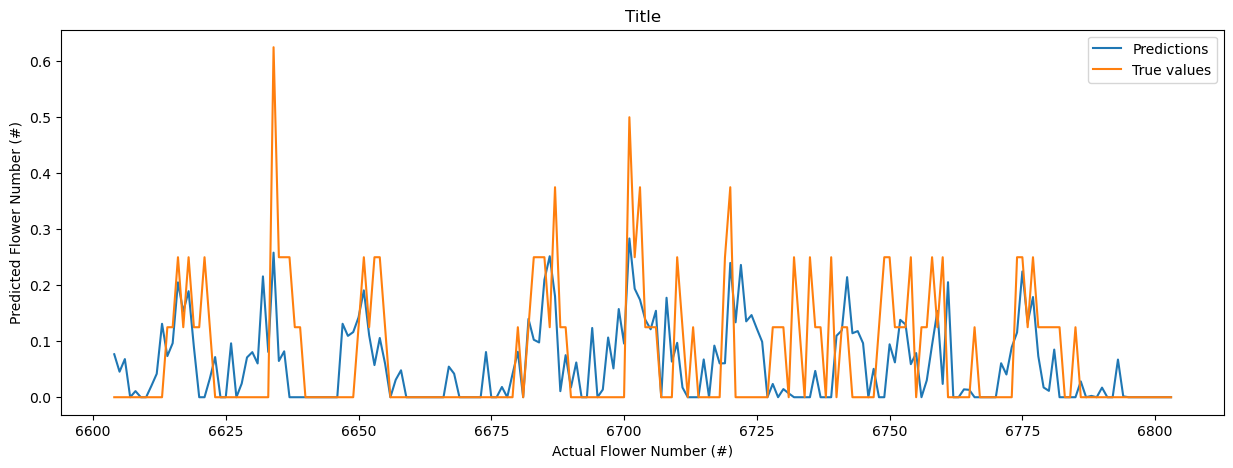

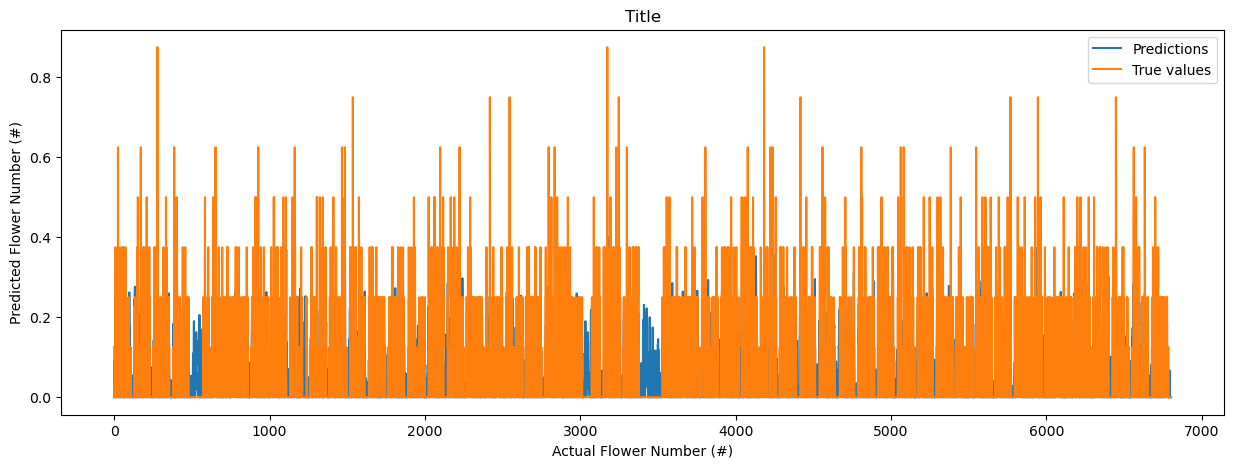

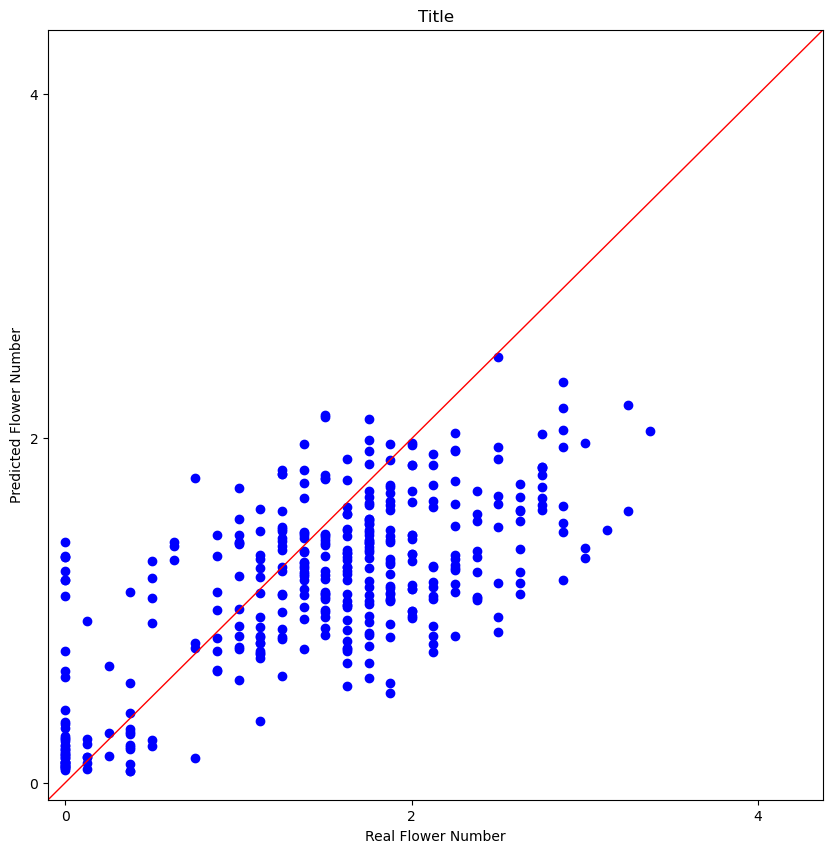

In [24]:
Model_2_scaled = pd.read_csv('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240919_Predictions_CNN/Model_SMSE_Prediction_male_all_data.csv')
mean = np.mean(Model_2['Actual'].values)
Prediction_plot(Model_2.iloc[-200:])
Prediction_plot(Model_2)
QQ_plot(Model_2)